In [1]:
#class based code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#from IPython.display import HTML

In [29]:
####################### Useful Constants #########################
G = 6.6743e-11 #m^3kg^-1s^-2; Gravitational Constant
AU = 1.496e11 #m; Astronomical Unit in meters
dt = 24.0*60*60 #s; Seconds in a Day

####################### Defining Classes #########################
class system:
    
    '''
    Solar System Class
    '''
    
    def __init__(self,xdim=32,ydim=32,zdim=32):
        
        '''
        Initializes a Solar System. The Solar System contains Celestial Body objects and simulate
        the movement of the planets using the Planet class methods.
        
        ---Attributes---
        xdim (int): The x size of the Solar System in Astronomical Units (AU)
        ydim (int): The y size of the Solar System in AU
        Bodies (list of Celestial_Body objects): Celestial Body objects in the Solar System
        '''
        
        self.xdim = xdim*AU
        self.ydim = ydim*AU
        self.zdim = zdim*AU
        self.bodies = []
        self.fig = plt.figure(figsize=(10,10))
        self.ax = self.fig.add_subplot(projection='3d')
    
    def add_body(self,body):
        self.bodies.append(body)
        
    def draw(self):
        cmap = [] 
        #self.fig.clear()
        for x in self.bodies:
            cmap.append(x.color)
        print(cmap)
        #creating colormaps does not seem to work
        #new_cmap = LinearSegmentedColormap.from_list('mycmap', cmap)
        print(cmap)
        list_x = []
        list_y = []
        list_z = []
        for x in self.bodies:
            list_x.append(x.pos[0])
            list_y.append(x.pos[1])
            list_z.append(x.pos[2])
        self.ax.scatter(xs=list_x, ys=list_y, zs=list_z, zdir='z', color=cmap)
        #plt.show()
        return(list_x, list_y, list_z)  
    def motion(self, timestep):
        grav = lambda mass_one, mass_two, pos_one, pos_two: (6.6743e-11*(mass_one*mass_two))/(pos_one + pos_two)**2
        for x in self.bodies:
            accel_vector = np.array([0,0,0]).astype(np.float64)
            for y in self.bodies:
                if y != x:
                    ax = grav(x.mass, y.mass, x.pos[0], y.pos[0])/x.mass
                    ay = grav(x.mass, y.mass, x.pos[1], y.pos[1])/x.mass
                    az = grav(x.mass, y.mass, x.pos[2], y.pos[2])/x.mass
                    accel_vector += np.array([ax,ay,az])
            x.vel += accel_vector*timestep
        for x in self.bodies:
            x.pos += x.vel*timestep
    def get_positions(self):
        for x in self.bodies:
            print(f'{x.name} at position {x.pos} with velocity {x.vel}')
    def animate(self, total_time, timestep):
        #first generate the plots needed for all iterations
        scatters = []
        for x in range(0, total_time, timestep):
            temp_x = []
            temp_y = []
            temp_z = []
            self.motion(timestep)
            for x in self.bodies:
                temp_x.append(x.pos[0])
                temp_y.append(x.pos[1])
                temp_z.append(x.pos[2])
            scatters.append([temp_x, temp_y, temp_z])
        anim = animation.FuncAnimation(fig = self.fig)
        

In [30]:
class body:
    def __init__(self, init_v=np.array([0,0,0]), init_pos=np.array([0,0,0]), mass=5, name='default', color='blue', size=7):
        self.vel = init_v.astype(np.float64)
        self.pos = init_pos.astype(np.float64)
        self.mass = mass
        self.name = name
        self.color = color
        self.size = size

['orange', 'green']
['orange', 'green']


([1.0, 0.0], [2.0, 0.01], [3.0, 0.0])

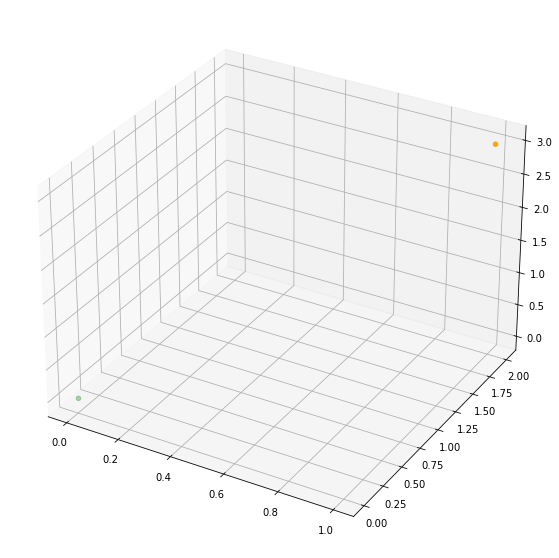

In [32]:
test_one = body(init_v = np.array([0,0,0]), init_pos=np.array([1,2,3]), color='orange', size = 10)
test_two = body(init_pos = np.array([0,0.01,0]), color='green')
me = system()
me.add_body(test_one)
me.add_body(test_two)
me.draw()

In [15]:
for x in range(0,10000):
    me.motion(0.01)
me.draw()

['orange', 'green']
['orange', 'green']


([1.0000016687400028, 1.668740001038323e-06],
 [2.000000413044647, 0.010000413044634754],
 [3.000000185415753, 1.854157543046679e-07])

In [16]:
me.animate(1000, 1)

TypeError: __init__() missing 1 required positional argument: 'func'